# Hello My First Deep Learning!! 🙋🏻‍♂️

> - 일단, 실행하기 앞서 코랩의 환경 설정해주는 것이 중요함.
> - **상단에 '런타입' -> '런타임 유형 변경' -> T4 GPU**

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *

In [1]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images' # 데이터 저장 경로

def is_cat(x): return x[0].isupper() # 고양이 라벨링 해주는 메서드

dls = ImageDataLoaders.from_name_func( # 데이터 업로드
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 153MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.166470,0.035318,0.012179,00:50


epoch,train_loss,valid_loss,error_rate,time
0,0.058790,0.015079,0.005413,00:50


In [5]:
import ipywidgets as widgets

#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

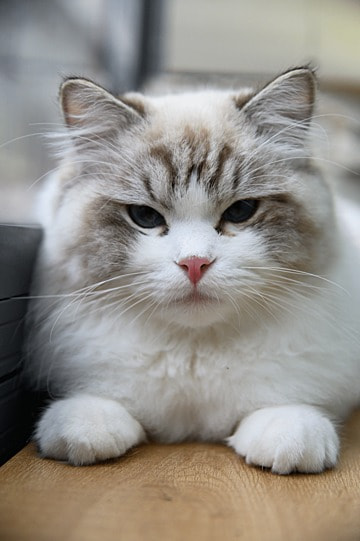

위에는 내가 테스트 업로드 한 냥이 사진이다옹😻

In [6]:
img = PILImage.create(uploader.data[0])
# 학습 시킨 모델로 부터 예측 시키기
is_cat,_,probs = learn.predict(img)
# 예측 결과 출력
print(f"Is this a cat?: {is_cat}.")
# 확률 출력
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000
